FIAP [Diangelis Barbato França- Bolsa (EMBRAER)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import tensorflow as tf
import sklearn

In [ ]:
np.__version__, pd.__version__, matplotlib.__version__, tf.__version__, sklearn.__version__

('2.0.2', '2.2.2', '3.10.0', '2.19.0', '1.6.1')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
base = pd.read_csv('/content/embrear_treinLO.csv')
base

,c,Open,High,Low,Close,Volume
0,2015-08-20 00:00:00-03:00,21.986374,22.228621,21.802265,21.918545,1812600
1,2015-08-21 00:00:00-03:00,21.705369,21.966997,21.569711,21.763508,1922000
2,2015-08-24 00:00:00-03:00,20.842968,21.656919,20.029016,21.104595,3701900
3,2015-08-25 00:00:00-03:00,21.327460,21.656917,21.104593,21.220871,2145900
4,2015-08-26 00:00:00-03:00,21.269326,22.354593,20.959248,22.354593,2084700
...,...,...,...,...,...,...
2326,2024-12-23 00:00:00-03:00,54.423919,55.942354,54.383959,55.492817,4696500
2327,2024-12-26 00:00:00-03:00,54.943385,56.252037,54.483859,56.182110,3878300
2328,2024-12-27 00:00:00-03:00,56.341946,56.641637,55.812489,56.272018,3926000
2329,2024-12-30 00:00:00-03:00,56.781489,57.031231,55.742558,56.132156,4084400


In [ ]:
base.isnull().sum()

,0
c,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [ ]:
base = base.dropna()

In [ ]:
base.shape

(2331, 6)

In [ ]:
base_treinamento = base.iloc[:, 1:2].values

In [ ]:
base_treinamento

array([[21.98637374],
       [21.70536898],
       [20.84296754],
       ...,
       [56.34194607],
       [56.78148878],
       [56.44184035]])

In [ ]:
normalizador = MinMaxScaler(feature_range=(0, 1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)
base_treinamento_normalizada

array([[0.3055424 ],
       [0.30020374],
       [0.28381941],
       ...,
       [0.95824639],
       [0.96659704],
       [0.96014423]])

In [ ]:
base_treinamento_normalizada.shape

(2331, 1)

In [ ]:
X = [] # previsores
y = [] # preço real
for i in range(90, 2331): # 90 preços anteriores
  X.append(base_treinamento_normalizada[i - 90:i, 0])
  y.append(base_treinamento_normalizada[i, 0])
  #print(i, i - 90)
X, y = np.array(X), np.array(y)

In [ ]:
X.shape

(2241, 90)

In [ ]:
y.shape

(2241,)

In [ ]:
X[0], y[0]

(array([0.3055424 , 0.30020374, 0.28381941, 0.29302405, 0.29191958,
        0.31677209, 0.30020372, 0.31364252, 0.30038784, 0.30425381,
        0.32616085, 0.31677212, 0.33149963, 0.32744946, 0.3294746 ,
        0.32155851, 0.32560866, 0.33831102, 0.34788389, 0.36021814,
        0.36132273, 0.36279548, 0.3646364 , 0.37531381, 0.35267028,
        0.35635217, 0.34935665, 0.35598404, 0.36371595, 0.35543178,
        0.35340678, 0.36003404, 0.36187509, 0.35966589, 0.36831832,
        0.37107968, 0.36647732, 0.36003405, 0.35377485, 0.36482052,
        0.37752297, 0.37476162, 0.37310466, 0.37899568, 0.40219151,
        0.39151402, 0.37697064, 0.39887777, 0.39409137, 0.40421645,
        0.40881888, 0.42962137, 0.40881871, 0.41065977, 0.40881875,
        0.393539  , 0.39538   , 0.39979825, 0.39501178, 0.41268476,
        0.42612364, 0.42170533, 0.4217054 , 0.42409862, 0.43385552,
        0.42630771, 0.42538724, 0.42409857, 0.42170533, 0.44490113,
        0.43109412, 0.44398065, 0.43808962, 0.44

In [ ]:
base[0:90]

,c,Open,High,Low,Close,Volume
0,2015-08-20 00:00:00-03:00,21.986374,22.228621,21.802265,21.918545,1812600
1,2015-08-21 00:00:00-03:00,21.705369,21.966997,21.569711,21.763508,1922000
2,2015-08-24 00:00:00-03:00,20.842968,21.656919,20.029016,21.104595,3701900
3,2015-08-25 00:00:00-03:00,21.327460,21.656917,21.104593,21.220871,2145900
4,2015-08-26 00:00:00-03:00,21.269326,22.354593,20.959248,22.354593,2084700
...,...,...,...,...,...,...
85,2015-12-23 00:00:00-02:00,28.790161,28.790161,27.945960,28.217657,1117700
86,2015-12-28 00:00:00-02:00,28.334096,28.431129,27.780997,27.790701,897900
87,2015-12-29 00:00:00-02:00,27.635447,28.304987,27.635447,28.198248,1197900
88,2015-12-30 00:00:00-02:00,27.984773,29.294741,27.965366,29.294741,4668700


In [ ]:
X.shape, X.shape[1]

((2241, 90), 90)

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 100, return_sequences=True, input_shape = (X.shape[1], 1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = 'linear'))

regressor.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 90, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 90, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 90, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 90, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,451 (435.36 KB)

 Trainable params: 111,451 (435.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [ ]:
regressor.fit(X, y, epochs = 100, batch_size = 32)

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 180ms/step - loss: 0.0182 - mean_absolute_error: 0.0886
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 182ms/step - loss: 0.0052 - mean_absolute_error: 0.0510
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 178ms/step - loss: 0.0082 - mean_absolute_error: 0.0553
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 178ms/step - loss: 0.0044 - mean_absolute_error: 0.0465
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - loss: 0.0039 - mean_absolute_error: 0.0428
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - loss: 0.0027 - mean_absolute_error: 0.0377
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - loss: 0.0024 - mean_absolute_error: 0.0349
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 178ms/step - loss: 0.0025 - mean_absolute_error: 0.0346
Epoch 9/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 178ms/step - loss: 0.0019 - mean_absolute_error: 0.0317
Epoch 10/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 175ms/step - loss: 0.0019 - mean_absolute_error: 0.0311
Epoch 11/

In [ ]:
# Importa a função necessária para salvar o modelo
from tensorflow.keras.models import load_model, save_model

# Salva o modelo treinado em um arquivo
regressor.save('modelo_Embraer_lstm.h5')
print("O modelo foi salvo com sucesso!")

O modelo foi salvo com sucesso!


In [ ]:
base_teste = pd.read_csv('/content/Embraer_testLO.csv')
base_teste

,Date,Open,High,Low,Close,Volume
0,2025-01-03 00:00:00-03:00,57.730514,57.940297,56.971294,56.971294,4186400
1,2025-01-06 00:00:00-03:00,57.260996,57.590658,56.282005,56.811459,3628100
2,2025-01-07 00:00:00-03:00,57.161102,58.160073,56.861408,57.990246,6228800
3,2025-01-08 00:00:00-03:00,58.289934,58.919287,57.151108,57.181080,5066900
4,2025-01-09 00:00:00-03:00,57.320934,57.660584,56.841428,57.290962,2185300
5,2025-01-10 00:00:00-03:00,57.241016,57.350904,56.262026,57.241016,5152800
6,2025-01-13 00:00:00-03:00,57.031232,58.000235,56.242044,56.491787,4258300
7,2025-01-14 00:00:00-03:00,56.491789,57.310944,55.752553,56.841431,4950100
8,2025-01-15 00:00:00-03:00,57.350904,58.729485,57.191069,58.000237,5991700
9,2025-01-16 00:00:00-03:00,58.020215,60.078092,57.960275,60.068104,7330600


In [ ]:
base_teste.shape

(22, 6)

In [ ]:
y_teste = base_teste.iloc[:, 1:2].values

In [ ]:
y_teste

array([[57.73051422],
       [57.26099613],
       [57.16110216],
       [58.28993405],
       [57.32093393],
       [57.24101639],
       [57.031232  ],
       [56.49178866],
       [57.35090407],
       [58.0202148 ],
       [60.03813414],
       [59.93823734],
       [60.43772461],
       [62.08602583],
       [61.686438  ],
       [61.83628483],
       [61.08705524],
       [59.73844133],
       [59.76841469],
       [59.23895904],
       [60.21794696],
       [59.78839099]])

In [ ]:
base.shape

(2331, 6)

In [ ]:
base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)

In [ ]:
2331 + 22

2353

In [ ]:
base_completa.shape

(2353,)

In [ ]:
base_completa

,Open
0,21.986374
1,21.705369
2,20.842968
3,21.327460
4,21.269326
...,...
17,59.738441
18,59.768415
19,59.238959
20,60.217947


In [ ]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values

In [ ]:
entradas

array([45.40321509, 46.15244341, 46.11248277, 46.11248464, 45.6129973 ,
       46.45213251, 46.26233033, 46.78179466, 45.89270982, 46.70187695,
       49.19930161, 49.84863437, 48.0504868 , 47.82072441, 48.69981892,
       49.43905634, 50.75769892, 50.69775903, 49.33915768, 48.3401884 ,
       47.70084702, 47.58097192, 48.38014779, 49.54894118, 50.34812255,
       50.44801773, 50.39807036, 48.21032237, 48.50002218, 47.91062985,
       45.97262696, 45.3532666 , 46.20239167, 46.5420414 , 45.75285557,
       45.95264961, 46.77180374, 45.13349281, 46.40218705, 46.45213521,
       48.78972749, 48.33020044, 48.4300948 , 49.91856482, 49.57891263,
       49.04945502, 49.44904782, 49.95852001, 49.04945469, 50.16830588,
       49.0494564 , 48.68983133, 48.82968679, 48.74976676, 48.45007399,
       49.99847794, 50.4979641 , 54.28406334, 55.61269162, 54.36398135,
       56.64163434, 55.43287992, 55.13318871, 53.77458967, 56.08221085,
       56.94132493, 56.94132638, 58.53967901, 56.68159642, 56.65

In [ ]:
entradas.shape

(112,)

In [ ]:
entradas = entradas.reshape(-1, 1)
entradas.shape

(112, 1)

In [ ]:
entradas

array([[45.40321509],
       [46.15244341],
       [46.11248277],
       [46.11248464],
       [45.6129973 ],
       [46.45213251],
       [46.26233033],
       [46.78179466],
       [45.89270982],
       [46.70187695],
       [49.19930161],
       [49.84863437],
       [48.0504868 ],
       [47.82072441],
       [48.69981892],
       [49.43905634],
       [50.75769892],
       [50.69775903],
       [49.33915768],
       [48.3401884 ],
       [47.70084702],
       [47.58097192],
       [48.38014779],
       [49.54894118],
       [50.34812255],
       [50.44801773],
       [50.39807036],
       [48.21032237],
       [48.50002218],
       [47.91062985],
       [45.97262696],
       [45.3532666 ],
       [46.20239167],
       [46.5420414 ],
       [45.75285557],
       [45.95264961],
       [46.77180374],
       [45.13349281],
       [46.40218705],
       [46.45213521],
       [48.78972749],
       [48.33020044],
       [48.4300948 ],
       [49.91856482],
       [49.57891263],
       [49

In [ ]:
entradas = normalizador.transform(entradas)

In [ ]:
entradas

array([[0.75042702],
       [0.76466123],
       [0.76390204],
       [0.76390208],
       [0.75441257],
       [0.77035487],
       [0.76674892],
       [0.77661795],
       [0.75972669],
       [0.77509964],
       [0.82254694],
       [0.83488328],
       [0.80072119],
       [0.79635605],
       [0.81305752],
       [0.82710191],
       [0.85215413],
       [0.85101536],
       [0.82520399],
       [0.80622508],
       [0.79407856],
       [0.79180112],
       [0.80698425],
       [0.82918956],
       [0.8443728 ],
       [0.84627066],
       [0.84532173],
       [0.80375782],
       [0.80926168],
       [0.79806412],
       [0.76124499],
       [0.74947808],
       [0.76561017],
       [0.772063  ],
       [0.75706967],
       [0.76086545],
       [0.77642814],
       [0.74530271],
       [0.76940598],
       [0.77035492],
       [0.81476565],
       [0.80603533],
       [0.80793317],
       [0.83621185],
       [0.82975897],
       [0.81970008],
       [0.82729174],
       [0.836

In [ ]:
X_teste = []
for i in range(90, 112):
  #print(i)
  X_teste.append(entradas[i - 90:i, 0])

In [ ]:
X_teste

[array([0.75042702, 0.76466123, 0.76390204, 0.76390208, 0.75441257,
        0.77035487, 0.76674892, 0.77661795, 0.75972669, 0.77509964,
        0.82254694, 0.83488328, 0.80072119, 0.79635605, 0.81305752,
        0.82710191, 0.85215413, 0.85101536, 0.82520399, 0.80622508,
        0.79407856, 0.79180112, 0.80698425, 0.82918956, 0.8443728 ,
        0.84627066, 0.84532173, 0.80375782, 0.80926168, 0.79806412,
        0.76124499, 0.74947808, 0.76561017, 0.772063  , 0.75706967,
        0.76086545, 0.77642814, 0.74530271, 0.76940598, 0.77035492,
        0.81476565, 0.80603533, 0.80793317, 0.83621185, 0.82975897,
        0.81970008, 0.82729174, 0.83697094, 0.81970007, 0.84095655,
        0.8197001 , 0.81286777, 0.81552481, 0.81400645, 0.80831274,
        0.83773008, 0.84721956, 0.91914973, 0.94439166, 0.92066805,
        0.96394002, 0.94097551, 0.93528183, 0.9094705 , 0.95331182,
        0.96963369, 0.96963371, 1.        , 0.96469924, 0.9641298 ,
        0.98785344, 0.98007209, 0.95255264, 0.95

In [ ]:
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

In [ ]:
X_teste.shape

(22, 90, 1)

In [ ]:
previsoes = regressor.predict(X_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step


In [ ]:
previsoes

array([[1.2276486],
       [1.2323471],
       [1.2388799],
       [1.2458144],
       [1.2531009],
       [1.2596031],
       [1.2644262],
       [1.2671047],
       [1.2672763],
       [1.2660877],
       [1.2652617],
       [1.2675625],
       [1.2735999],
       [1.2827809],
       [1.2951051],
       [1.3091072],
       [1.323082 ],
       [1.3349439],
       [1.3423845],
       [1.3448479],
       [1.3427173],
       [1.3381839]], dtype=float32)

In [ ]:
previsoes = normalizador.inverse_transform(previsoes)

In [ ]:
previsoes

array([[70.52213 ],
       [70.76945 ],
       [71.113304],
       [71.47831 ],
       [71.86183 ],
       [72.20409 ],
       [72.457954],
       [72.59894 ],
       [72.60797 ],
       [72.5454  ],
       [72.50192 ],
       [72.62303 ],
       [72.94081 ],
       [73.424065],
       [74.07276 ],
       [74.80977 ],
       [75.54534 ],
       [76.1697  ],
       [76.56134 ],
       [76.69101 ],
       [76.578865],
       [76.34024 ]], dtype=float32)

In [ ]:
y_teste

array([[57.73051422],
       [57.26099613],
       [57.16110216],
       [58.28993405],
       [57.32093393],
       [57.24101639],
       [57.031232  ],
       [56.49178866],
       [57.35090407],
       [58.0202148 ],
       [60.03813414],
       [59.93823734],
       [60.43772461],
       [62.08602583],
       [61.686438  ],
       [61.83628483],
       [61.08705524],
       [59.73844133],
       [59.76841469],
       [59.23895904],
       [60.21794696],
       [59.78839099]])

In [ ]:
previsoes.mean()

np.float32(73.47356)

In [ ]:
y_teste.mean()

np.float64(59.08003133696597)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_teste, previsoes)

14.393524834798056

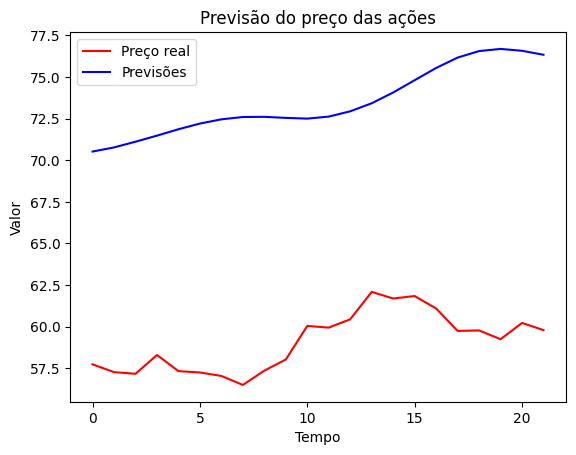

In [ ]:
plt.plot(y_teste, color = "red", label = "Preço real")
plt.plot(previsoes, color = "blue", label = "Previsões")
plt.title("Previsão do preço das ações")
plt.xlabel("Tempo")
plt.ylabel("Valor")
plt.legend();

In [ ]:
# Importa as bibliotecas necessárias
from flask import Flask, request, jsonify
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Inicializa o Flask
app = Flask(__name__)

# Carrega o modelo e o scaler na inicialização da API
# Isso é feito uma única vez para otimizar o desempenho
MODEL = tf.keras.models.load_model('/content/modelo_Embraer_lstm.h5')

# Em um projeto de produção, o scaler deve ser salvo junto com o modelo.
# Para este exemplo, ele será reajustado com os dados de treinamento.
df_data = pd.read_csv('/content/embrear_treinLO.csv')
data = df_data['Close'].values.reshape(-1, 1)
SCALER = MinMaxScaler(feature_range=(0, 1))
SCALER.fit(data)


# Define a rota da API para fazer a previsão
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Extrai os dados de entrada da requisição JSON
        json_data = request.json
        input_data = np.array(json_data['data']).reshape(-1, 1)

        # Verifica se a sequência de entrada tem o tamanho correto
        if len(input_data) != 90:
            return jsonify({'error': 'A entrada deve conter 90 dias de dados.'}), 400

        # Pré-processa os dados usando o scaler
        scaled_input = SCALER.transform(input_data)
        scaled_input = scaled_input.reshape(1, 90, 1)

        # Faz a predição
        prediction = MODEL.predict(scaled_input)

        # Desnormaliza a predição para o valor original
        prediction_real = SCALER.inverse_transform(prediction)[0][0]

        # Retorna a previsão como um JSON
        return jsonify({'prediction': float(prediction_real)})

    except Exception as e:
        return jsonify({'error': str(e)}), 500


# Executa a aplicação
if __name__ == '__main__':
    # Para rodar localmente na porta 5000
    app.run(debug=True, host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)
